# Table of content

## EDA
1. [Problem statement and data collection](##1-problem-statement-and-data-collection)  
2. [Exploration and data cleaning](##2-Exploration-and-data-cleaning)
   - [2.1: Understanding the features](###21-Understanding-the-features)  
   - [2.2: Identifying null values](###22-Identifying-null-values)  
   - [2.3: Eliminating irrelevant information and dealing with duplicate values ](###23-Eliminating-irrelevant-information-and-dealing-with-duplicate-values)  
3. [Univariate Analysis](##3-Univariate-Analysis)  
   - [3.1: Categorical Variable Analysis](###31-Categorical-Variable-Analysis)  
   - [3.2: Numerical Variable Analysis](###32-Numerical-Variable-Analysis)  
4. [Multivariate Analysis](##4-Multivariate-Analysis)  
   - [4.1 Numerical - Numerical Variable Analysis](###41-Numerical---Numerical-Variable-Analysis)
   - [4.2 Categorical - Categorical Variable Analysis](###42-Categorical---Categorical-Variable-Analysis) 
   - [4.3 Exploring combinations of the target variable with multiple predictors](###43-Exploring-combinations-of-the-target-variable-with-multiple-predictors) 
   - [4.4 Encoding Categorical Values and Saving JSON files](###44-Encoding-Categorical-Values-and-Saving-JSON-files) 
   - [4.5 Correlation Analysis](###45-Correlation-Analysis) 
5. [Feature Engineering](##5-Feature-Engineering)
   - [5.1 Outlier Analysis](###51-Outlier-Analysis)
   - [5.2 Split train test of both Data Frames](###52-Split-train-test-of-both-Data-Frames)
   - [5.3 Feature Scaling](###53-Feature-Scaling)
   - [5.4 Saving Data Frames into excel files](###54-Saving-Data-Frames-into-excel-files) 
   - [5.5 Feature selection](###55-Feature-selection)

## Machine Learning
6. [Linear Regression](###6-Linear-Regression)
7. [Lasso model](###7-Lasso-model)
8. [Ridge model](###8-Ridge-model)
9. [Elastic Net](###9-Elastic-Net)

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## EDA

## 1. Problem statement and data collection

In [1]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from pickle import dump
from sklearn.preprocessing import MinMaxScaler
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 2. Exploration and data cleaning
    

### 2.1 Understanding the features

- **age**: Age of primary beneficiary (numeric)

- **sex**: Gender of the primary beneficiary (categorical)

- **bmi**: Body mass index (numeric)

- **children**: Number of children/dependents covered by health insurance (numeric)

- **smoker**: Is the person a smoker? (categorical)

- **region**: Beneficiary's residential area in the U.S.: northeast, southeast, southwest, northwest (categorical)

- **charges**: Health insurance premium (numerical)

In [3]:
total_data.shape

(1338, 7)

Our dataframe contains 1338 rows and it has 7 columns or variables.

### 2.2 Identifying null values

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We do not have any nulls  in the dataframe and we have three categorical and 4 numerical variables.

### 2.3 Eliminating irrelevant information and dealing with duplicate values

In [5]:
total_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataframe contained one null row.

In [6]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


We have eliminated the variable/column "region2, as we believe is not relevant for the model.

## 3. Univariate Analysis

### 3.1 Categorical Variable Analysis

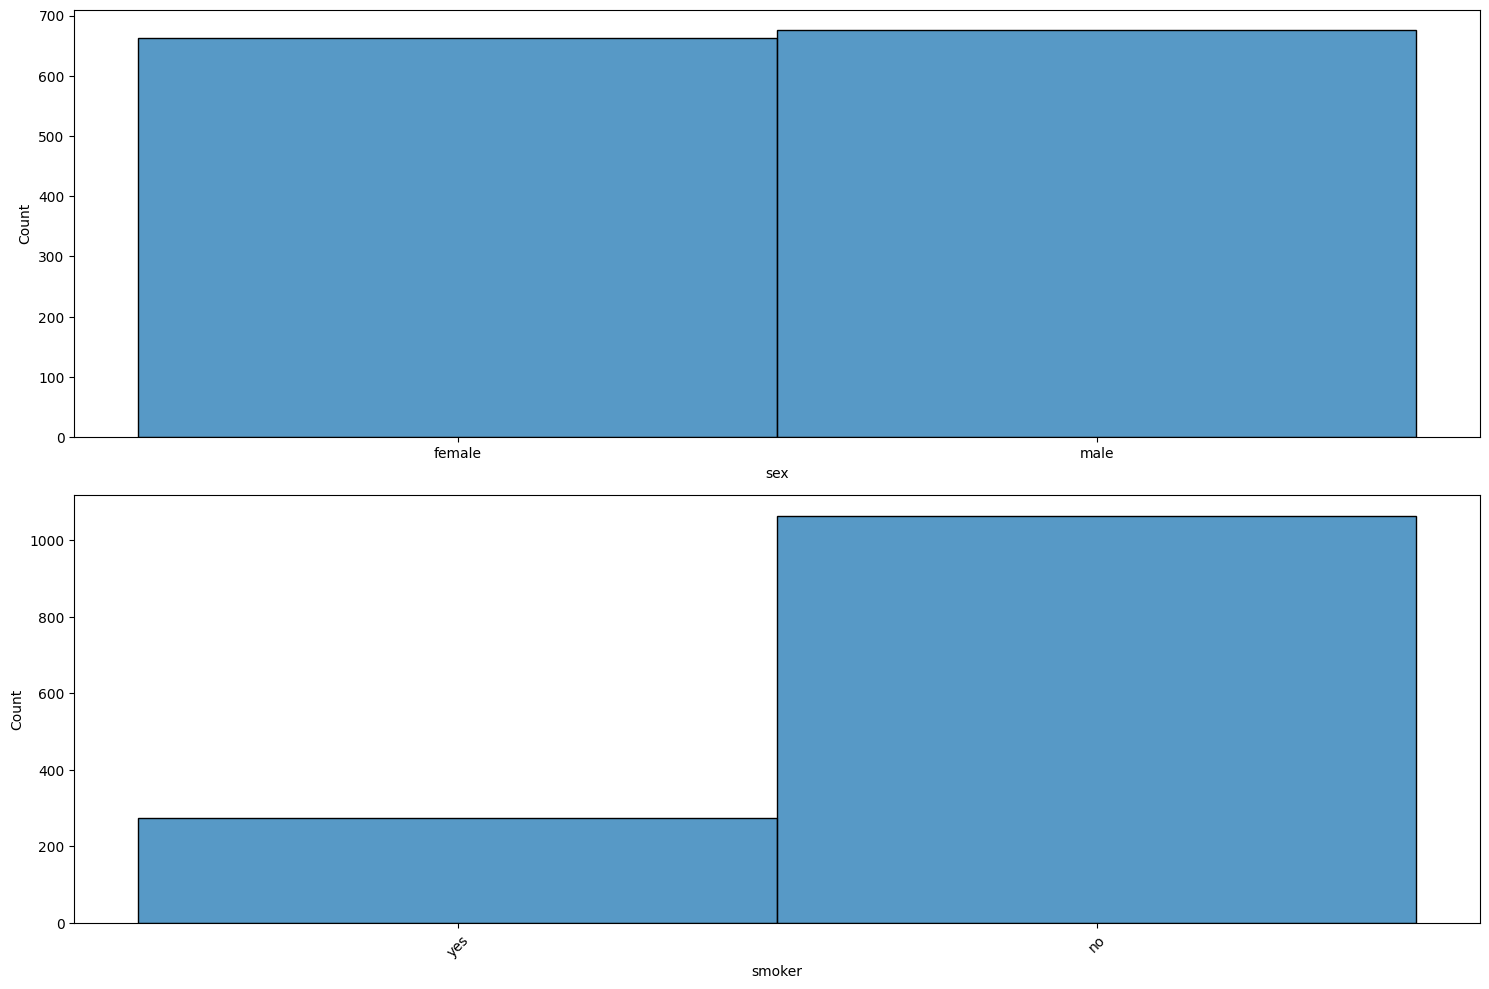

In [7]:
fig, axis = plt.subplots(2, figsize=(15, 10))

sns.histplot(ax = axis[0], data = total_data, x = "sex")
plt.xticks(rotation=45)
sns.histplot(ax = axis[1], data = total_data, x = "smoker")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [8]:
counts = total_data['sex'].value_counts()

# Calculate percentage
percentages = (counts / counts.sum()) * 100

print(percentages)

sex
male      50.523169
female    49.476831
Name: count, dtype: float64


In [9]:
counts = total_data['smoker'].value_counts()

# Calculate percentage
percentages = (counts / counts.sum()) * 100

print(percentages)

smoker
no     79.521674
yes    20.478326
Name: count, dtype: float64


**Conclusions**:

- There are almost equal numbers of males and females in the dataframe, with the number of males being slightly higher than that of females: 50.52% versus 49.47%.

- In comparison, there are significantly more non-smokers than smokers in the dataframe. 79.52% of the individuals are non-smokers, while just over 20% are smokers.

### 3.2 Numerical Variable Analysis

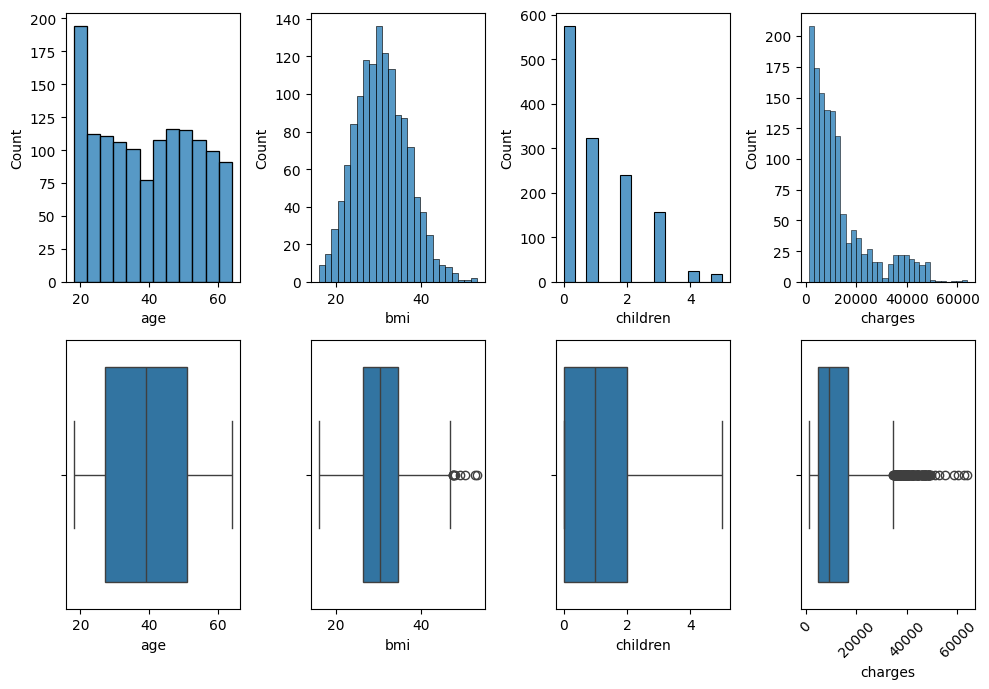

In [10]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[0,2], data = total_data, x = "children")
sns.boxplot(ax = axis[1,2], data = total_data, x = "children")
sns.histplot(ax = axis[0,3], data = total_data, x = "charges")
sns.boxplot(ax = axis[1,3], data = total_data, x = "charges")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Conclusions**:

- The median age is around 40 years. Although the histogram shows that there are nearly 200 individuals in their twenties, only a few outliers appear on the boxplot below 30 or above 50 years of age.

- Regarding BMI (Body Mass Index), the median value is 30. However, there are several outliers with a BMI over 50.

- The median number of children per individual is one. While most individuals have either 0 or 1 child, a few have four or more.

- As for the charges, the median is approximately 10,000 dollars. However, there are several noticeable outliers exceeding 40,000 dollars.

## 4. Multivariate Analysis

### 4.1 Numerical - Numerical Variable Analysis

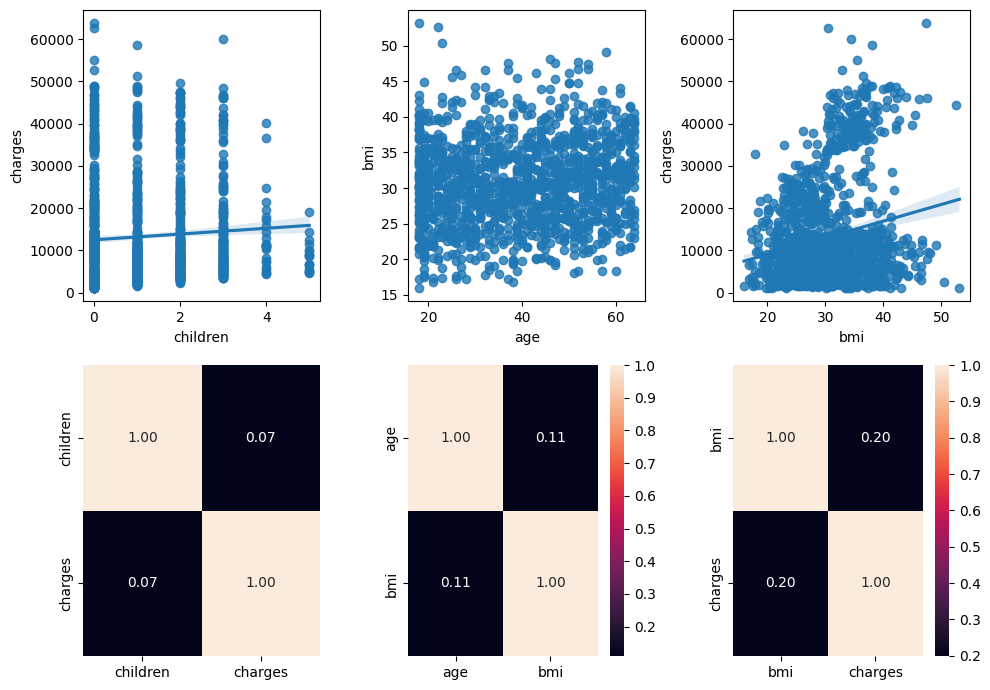

In [11]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "bmi")
sns.heatmap(total_data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()

plt.show()

**Conclusions**:
- The correlation between charges and the number of children is low, which may be due to the small number of individuals with more than two children.

- The correlation between age and BMI is slightly higher but still weak. There is no strong relationship between age and higher BMI, as the regression plot shows some individuals in their twenties with high BMI.

- The correlation between BMI and charges is stronger than in the previous two cases. Generally, higher BMI is associated with higher charges, although the correlation is not particularly strong.


### 4.2 Categorical - Categorical Variable Analysis

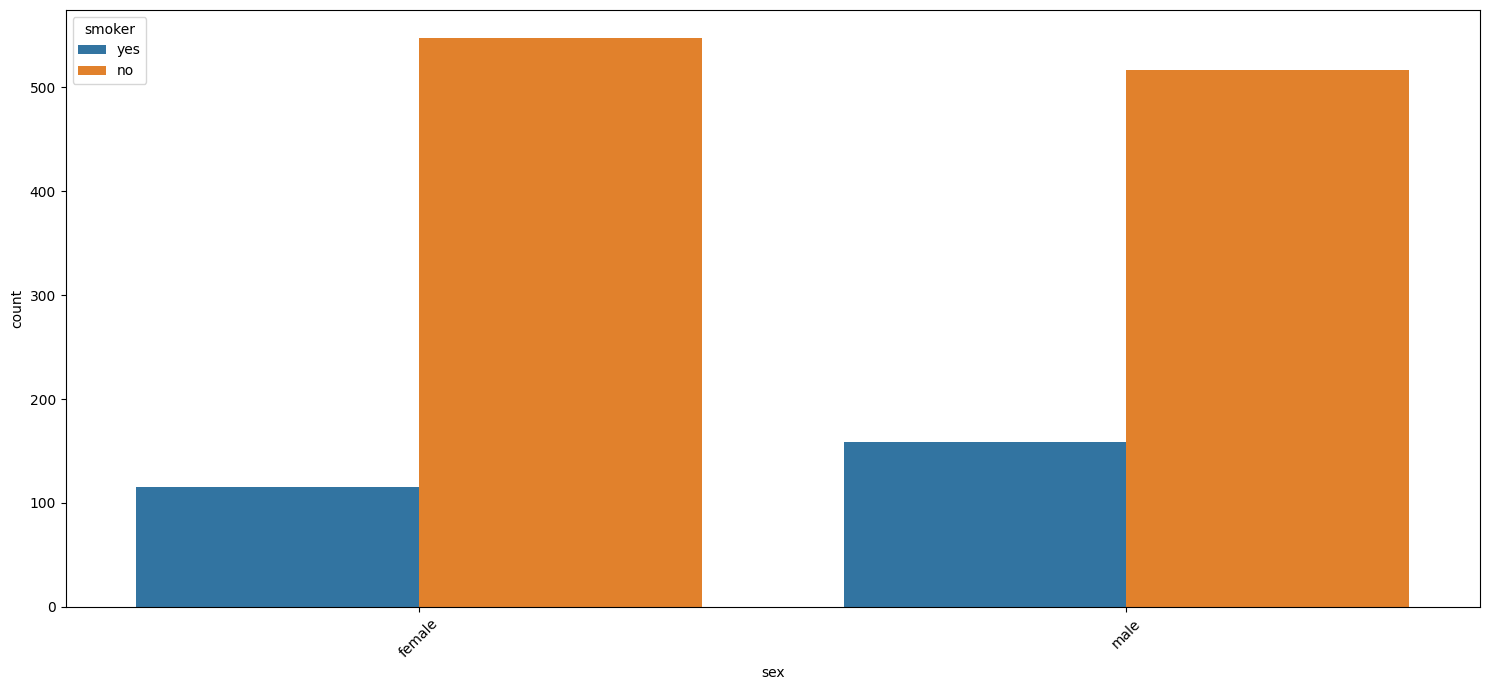

In [12]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "sex", hue = "smoker")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Conclusions**:

We analysed the countplot above to explore the relationship between an individual's sex and their smoking status. As observed in previous graphs, the number of non-smokers is higher than that of smokers. Within this dataset, male individuals are slightly more likely to be smokers compared to females.

### 4.3 Exploring combinations of the target variable with multiple predictors

In [13]:
top_10_charges = total_data['charges'].value_counts().nlargest(10).index
filtered_data = total_data[total_data['charges'].isin(top_10_charges)]

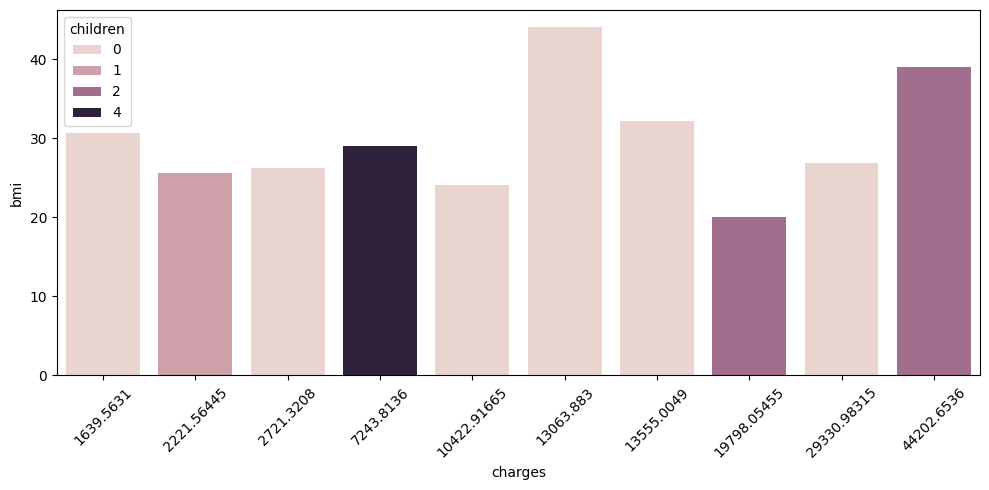

In [14]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)
sns.barplot(data = filtered_data, x = "charges", y = "bmi", hue = "children")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusions**:

In the barplot above, we attempted to explore the relationship between the number of children, BMI, and medical insurance charges. While both variables appear to be associated with increased charges, it seems that, in most cases, having two or more children combined with a high BMI leads to higher costs.

However, we also observed that individuals with no children and a similar BMI tend to pay more than those with four children. This suggests that the number of children and BMI alone do not fully explain the variation in charges.

Further analysis of additional variables is necessary to gain a complete understanding of the factors influencing insurance costs.

### 4.4 Encoding Categorical Values and Saving JSON files

In [15]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data[["sex_n", "sex"]]

,sex_n,sex
0,0,female
1,1,male
2,1,male
3,1,male
4,1,male
...,...,...
1333,1,male
1334,0,female
1335,0,female
1336,0,female


In [16]:
sex_rules = {row["sex"]: row["sex_n"] for index, row in total_data[["sex_n", "sex"]].drop_duplicates().iterrows()}
print(sex_rules)

with open("./sex_rules.json", "w") as f:
  json.dump(sex_rules, f)
with open("./sex_rules.json", "r") as f:
    y_rules = json.load(f)
print("2", sex_rules)
total_data["sex_n"] = total_data["sex"].apply(lambda x: sex_rules[x])
total_data

{'female': 0, 'male': 1}
2 {'female': 0, 'male': 1}


,age,sex,bmi,children,smoker,charges,sex_n
0,19,female,27.900,0,yes,16884.92400,0
1,18,male,33.770,1,no,1725.55230,1
2,28,male,33.000,3,no,4449.46200,1
3,33,male,22.705,0,no,21984.47061,1
4,32,male,28.880,0,no,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1
1334,18,female,31.920,0,no,2205.98080,0
1335,18,female,36.850,0,no,1629.83350,0
1336,21,female,25.800,0,no,2007.94500,0


In [17]:
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data[["smoker_n", "smoker"]]

,smoker_n,smoker
0,0,yes
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
1333,1,no
1334,1,no
1335,1,no
1336,1,no


In [18]:
smoker_rules = {row["smoker"]: row["smoker_n"] for index, row in total_data[["smoker_n", "smoker"]].drop_duplicates().iterrows()}
print(smoker_rules)

with open("./smoker_rules.json", "w") as f:
  json.dump(smoker_rules, f)
with open("./smoker_rules.json", "r") as f:
    smoker_rules = json.load(f)
print("2", smoker_rules)
total_data["smoker_n"] = total_data["smoker"].apply(lambda x: smoker_rules[x])
total_data


{'yes': 0, 'no': 1}
2 {'yes': 0, 'no': 1}


,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


### 4.5 Correlation Analysis

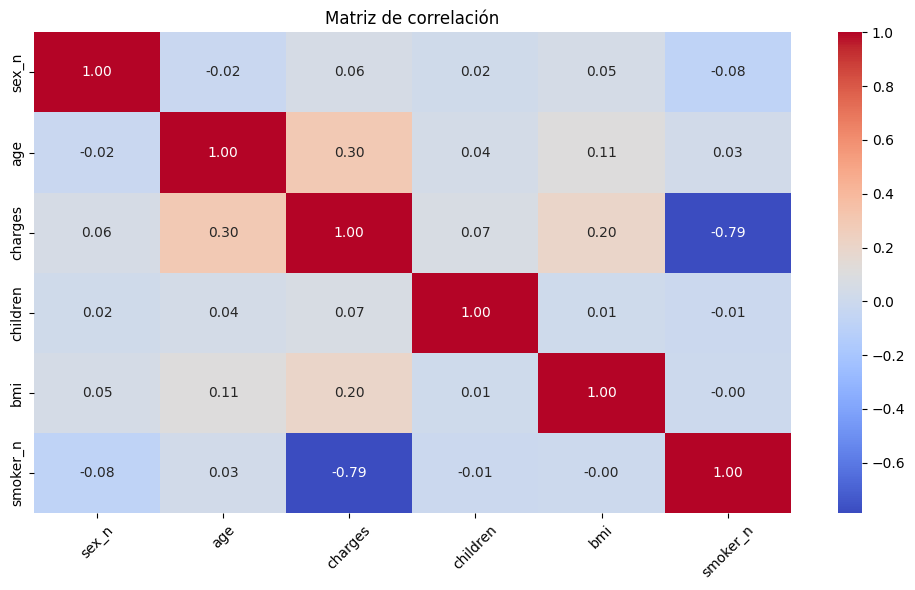

In [19]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["sex_n", "age", "charges", "children", "bmi", "smoker_n"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")

plt.title("Matriz de correlación")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Conclusions**:

In the heatmap above, we observe that the strongest correlation with insurance charges is whether or not the individual is a smoker. The next most relevant variable, although much less strongly correlated, is age, followed by BMI.

As shown in previous plots, the number of children is not strongly related to insurance charges, nor is the sex of the individual. There is also a slight correlation between BMI and age, but it is not significant.



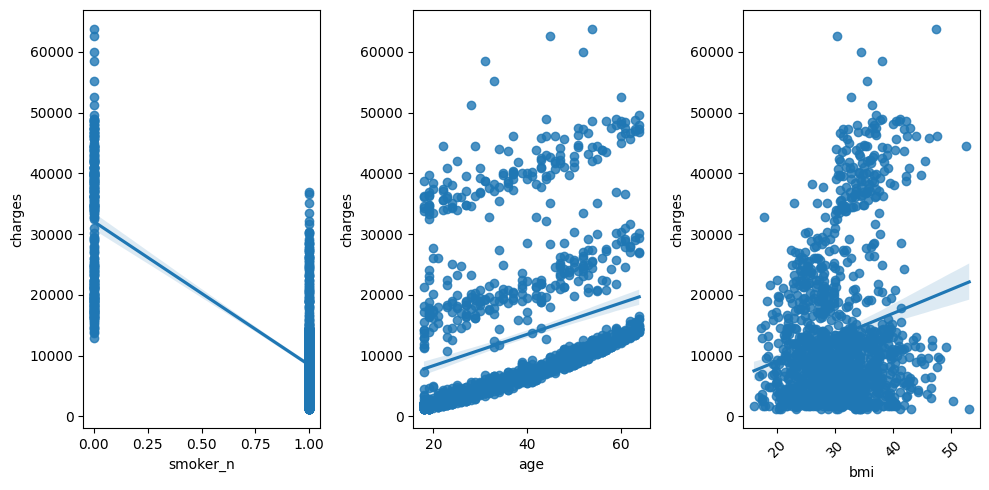

In [20]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)

sns.regplot(ax = axis[0], data = total_data, x = "smoker_n", y = "charges")
sns.regplot(ax = axis[1], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[2], data = total_data, x = "bmi", y = "charges")

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

**Conclusions**:

- As suggested by the heatmap, there is a strong correlation between insurance charges and smoking status — individuals who smoke tend to pay more for their insurance.

- Older individuals also tend to pay higher insurance charges; however, this correlation is not as strong as that of the smoking variable.

- BMI is another factor linked to increased charges. Generally, individuals with higher BMI tend to pay more. However, similar to age, the correlation is not strong on its own. For instance, there are several individuals with an average BMI between 30 and 35 who incur higher charges than some individuals with a BMI over 50.

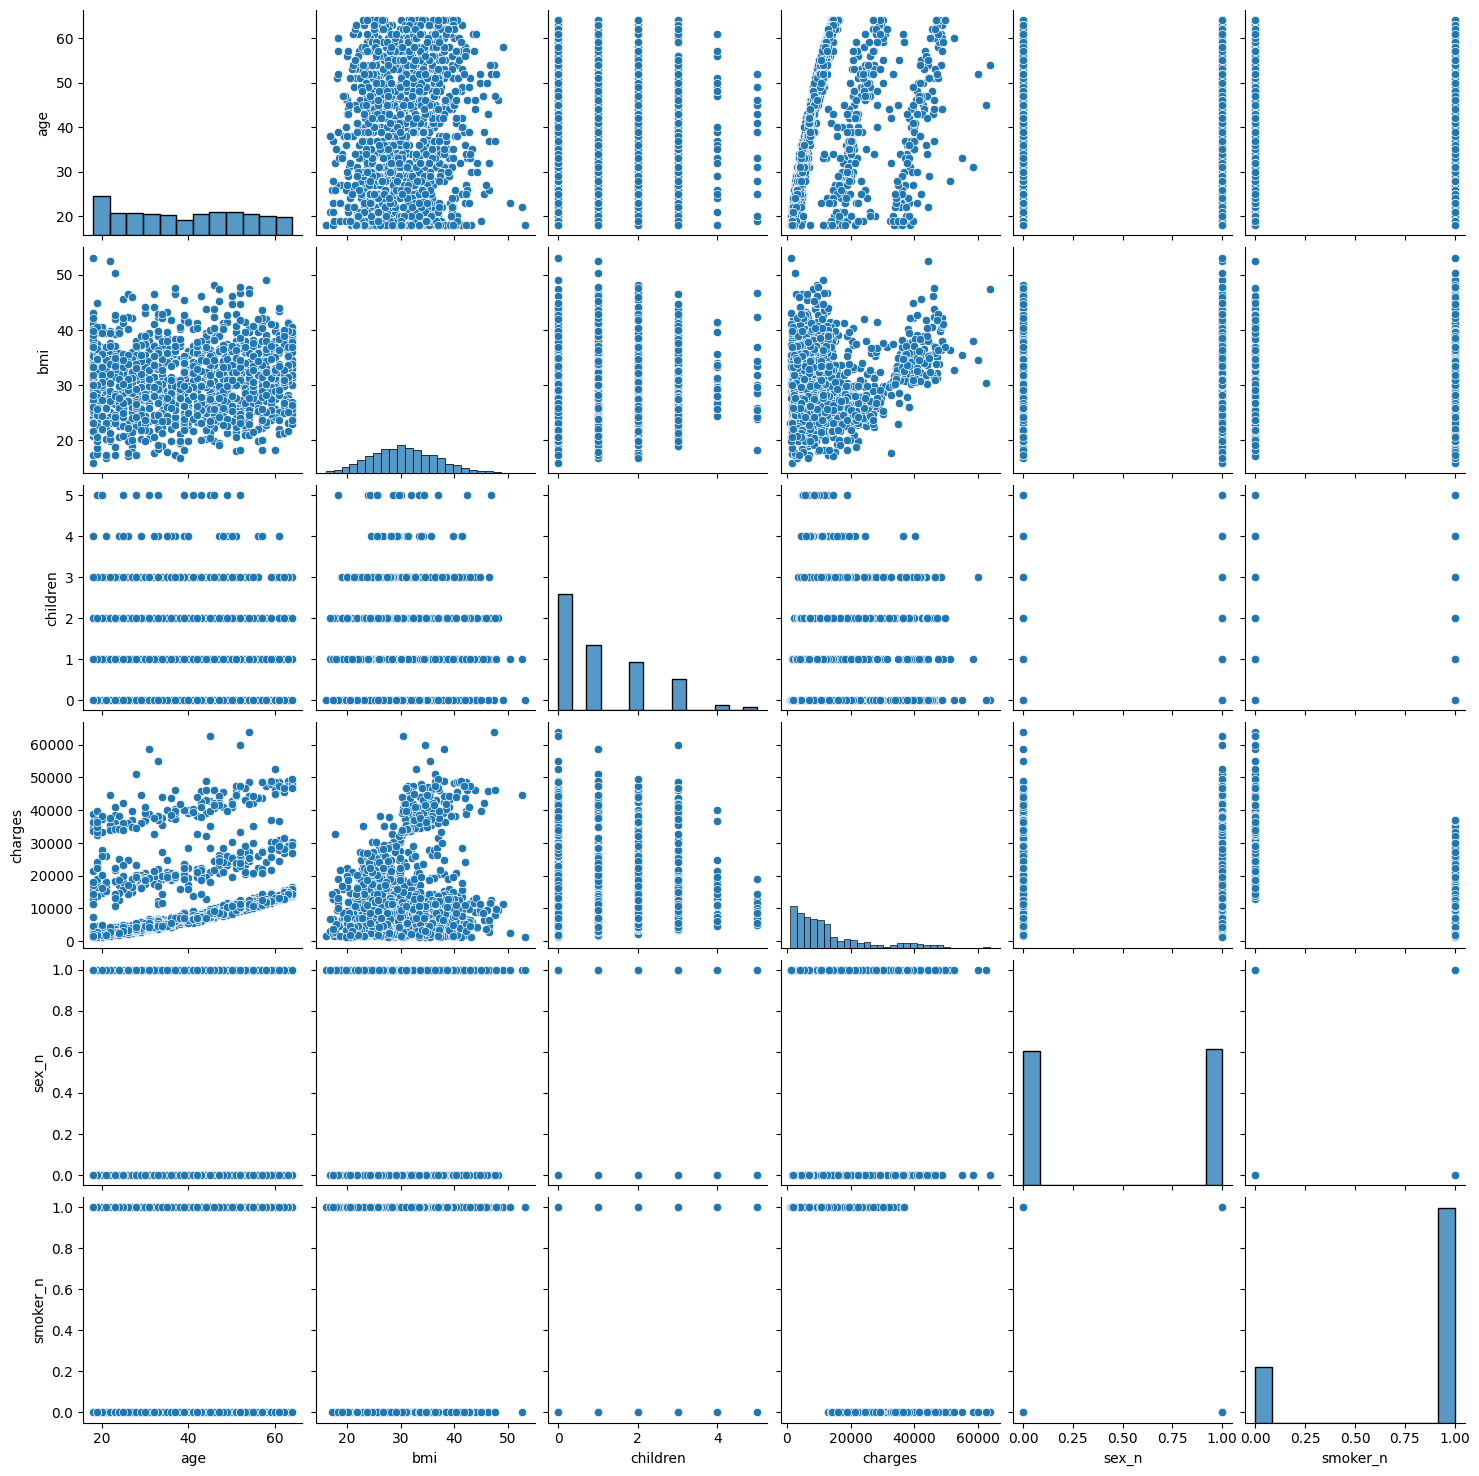

In [21]:
sns.pairplot(data = total_data)

## 5. Feature Engineering

### 5.1 Outlier Analysis

In [22]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.795217
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,1.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


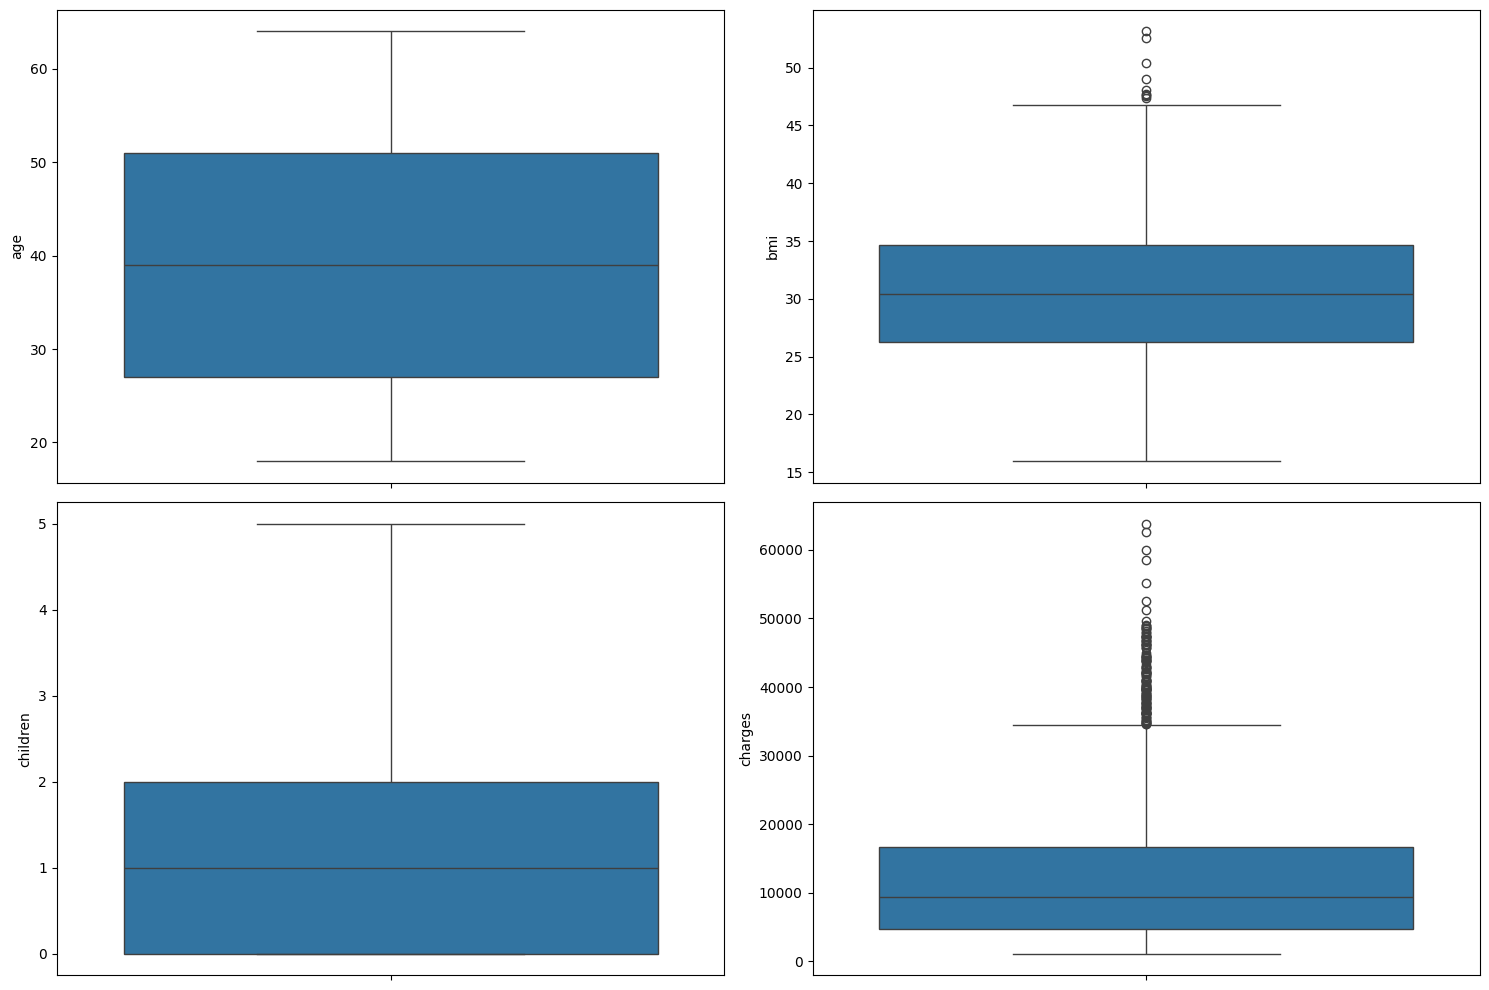

In [23]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1,0], data = total_data, y = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "charges")

plt.tight_layout()

plt.show()

In [24]:
numerical_columns = [
  "age",
  "children",
  "charges",
  "bmi",
  ]
for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 5.0 y 0, con un rango intercuartílico de 2.0
Los límites superior e inferior para la búsqueda de outliers son 34489.35 y 0, con un rango intercuartílico de 11899.63


**Conslusions**:

After analysing the outliers, we found that the variables"age" and "children" have some values above the 75th percentile. However, these are not extreme enough to warrant removal.

In the case of the target variable "charges", we decided not to alter it in order to preserve the integrity of the model.

We observed that the "BMI" variable has a larger number of outliers, both at the upper end and beyond the 75th percentile. Therefore, we created a new dataframe excluding the outliers in the BMI variable.

In [25]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['bmi']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'bmi': [np.float64(13.7), np.float64(47.290000000000006)]}

In [26]:
total_data_CON_outliers

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


In [27]:
total_data_SIN_outliers

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.900,0,yes,16884.92400,0,0
1,18,male,33.770,1,no,1725.55230,1,1
2,28,male,33.000,3,no,4449.46200,1,1
3,33,male,22.705,0,no,21984.47061,1,1
4,32,male,28.880,0,no,3866.85520,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,1,1
1334,18,female,31.920,0,no,2205.98080,0,1
1335,18,female,36.850,0,no,1629.83350,0,1
1336,21,female,25.800,0,no,2007.94500,0,1


In [28]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [29]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

### 5.2 Split train test of both Data Frames

In [30]:

num_variables = ["age", "children", "bmi", "sex_n", "smoker_n"]

X_CON = total_data_CON_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_CON_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)
X_SIN = total_data_SIN_outliers.drop("charges", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()


,age,children,bmi,sex_n,smoker_n
560,46,2,19.95,0,1
1285,47,0,24.32,0,1
1142,52,0,24.86,0,1
969,39,5,34.32,0,1
486,54,3,21.47,0,1


### 5.3 Feature Scaling

Normalization

In [31]:
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)
X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)
X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,age,children,bmi,sex_n,smoker_n
560,0.472227,0.734336,-1.756525,-1.024602,0.508747
1285,0.543313,-0.911192,-1.033082,-1.024602,0.508747
1142,0.898745,-0.911192,-0.943687,-1.024602,0.508747
969,-0.025379,3.202629,0.622393,-1.024602,0.508747
486,1.040918,1.557100,-1.504893,-1.024602,0.508747


Min-Max Scaling

In [32]:
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)
X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)
X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,age,children,bmi,sex_n,smoker_n
560,0.608696,0.4,0.107345,0.0,1.0
1285,0.630435,0.0,0.224913,0.0,1.0
1142,0.739130,0.0,0.239440,0.0,1.0
969,0.456522,1.0,0.493947,0.0,1.0
486,0.782609,0.6,0.148238,0.0,1.0


### 5.4 Saving Data Frames into excel files

In [33]:
X_train_con_outliers.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/E-Pablos-Regresion-Lineal/data/processed/y_test.xlsx", index = False)

with open("/workspaces/E-Pablos-Regresion-Lineal/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/E-Pablos-Regresion-Lineal/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/E-Pablos-Regresion-Lineal/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/E-Pablos-Regresion-Lineal/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

### 5.6 Feature selection

#### Feature selection dataset with outliers:

In [34]:
from sklearn.feature_selection import f_classif, SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def best_k(x_train, y_train):
    scores = []

    for k in range(1, x_train.shape[1] + 1):
        selector = SelectKBest(score_func=f_regression, k=k)
        X_new = selector.fit_transform(x_train, y_train)
        # Modelo simple para comparar (usa el que prefieras)
        model = LinearRegression()
        cv_score = cross_val_score(model, X_new, y_train, cv=5, scoring='r2').mean()
        scores.append(cv_score)
    # Mostrar el k con mejor score
    best_k = np.argmax(scores) + 1
    return best_k

k = best_k(X_train_sin_outliers_scal, y_train)
print (k)

selection_model = SelectKBest(f_classif, k = k)

selection_model.fit(X_train_con_outliers, y_train)
ix = selection_model.get_support()

X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()


4


/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,bmi,sex_n,smoker_n
0,2.0,19.95,0.0,1.0
1,0.0,24.32,0.0,1.0
2,0.0,24.86,0.0,1.0
3,5.0,34.32,0.0,1.0
4,3.0,21.47,0.0,1.0


In [35]:
X_train_con_outliers_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_con_outliers_sel.csv", index=False)
X_test_con_outliers_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_con_outliers_sel.csv", index=False)

**Conclusions**:

After analysing the optimal feature selection, we found that the best approach is to include four variables, excluding the variable "age".

#### Feature selection dataset without outliers:

In [36]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train_sin_outliers, y_train)

ix = selection_model.get_support()
X_train_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_train_sin_outliers), columns = X_train_sin_outliers.columns.values[ix])
X_test_sin_outliers_sel = pd.DataFrame(selection_model.transform(X_test_sin_outliers), columns = X_test_sin_outliers.columns.values[ix])

X_train_sin_outliers_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,children,bmi,sex_n,smoker_n
0,2.0,19.95,0.0,1.0
1,0.0,24.32,0.0,1.0
2,0.0,24.86,0.0,1.0
3,5.0,34.32,0.0,1.0
4,3.0,21.47,0.0,1.0


In [37]:
X_train_sin_outliers_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_sin_outliers_sel.csv", index=False)
X_test_sin_outliers_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_sin_outliers_sel.csv", index=False)

#### Feature selection on normalised datasets with and without outliers:

In [38]:
X_train_con_outliers_norm_sel = X_train_con_outliers_norm[X_train_con_outliers_sel.columns]
X_train_sin_outliers_norm_sel = X_train_sin_outliers_norm[X_train_sin_outliers_sel.columns]
X_test_con_outliers_norm_sel = X_test_con_outliers_norm[X_test_con_outliers_sel.columns]
X_test_sin_outliers_norm_sel = X_test_sin_outliers_norm[X_test_sin_outliers_sel.columns]

In [39]:
X_train_con_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_con_outliers_norm_sel.csv", index=False)
X_train_sin_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_sin_outliers_norm_sel.csv", index=False)
X_test_con_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_con_outliers_norm_sel.csv", index=False)
X_test_sin_outliers_norm_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_sin_outliers_norm_sel.csv", index=False)

#### Feature selection on Min-Max scaled datasets with and without outliers:

In [40]:
X_train_con_outliers_scal_sel = X_train_con_outliers_scal[X_train_con_outliers_sel.columns]
X_train_sin_outliers_scal_sel = X_train_sin_outliers_scal[X_train_sin_outliers_sel.columns]
X_test_con_outliers_scal_sel = X_test_con_outliers_scal[X_test_con_outliers_sel.columns]
X_test_sin_outliers_scal_sel = X_test_sin_outliers_scal[X_test_sin_outliers_sel.columns]

In [41]:
X_train_con_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_con_outliers_scal_sel.csv", index=False)
X_train_sin_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_train_sin_outliers_scal_sel.csv", index=False)
X_test_con_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_con_outliers_scal_sel.csv", index=False)
X_test_sin_outliers_scal_sel.to_csv("/workspaces/E-Pablos-Regresion-Lineal/data/processed/X_test_sin_outliers_scal_sel.csv", index=False)

## Machine Learning

### 6. Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
r2_results = []
mse_results = []
for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = LinearRegression()
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)
print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))


R2 scores: [0.7410888590280913, 0.7414527196921326, 0.7410888590280913, 0.7414527196921326, 0.7410888590280913, 0.7414527196921326, 0.6523487419452709, 0.653049771715517, 0.6523487419452709, 0.653049771715517, 0.6523487419452708, 0.653049771715517]
Mejor R2: 0.7414527196921326
MSE: [37369582.73531941, 37317065.40779932, 37369582.73531941, 37317065.407799326, 37369582.73531941, 37317065.407799326, 50177765.24465448, 50076583.078831896, 50177765.24465448, 50076583.078831896, 50177765.244654484, 50076583.078831896]
Menor MSE: 37317065.40779932


**Conclusions**:

After analysing the model using linear regression, we found that the best-performing dataframe is **X_train_sin_outliers**. This dataset includes five variables and has had outliers removed from the "BMI" variable.

It achieved an R² score of 74.14%, with the lowest mean squared error (MSE) at 37317065.40.


In [43]:
model = LinearRegression()
model.fit(X_train_sin_outliers, y_train)
y_pred_test = model.predict(X_test_sin_outliers)

# Evaluación
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print("R2 en test:", r2_test)
print("MSE en test:", mse_test)

R2 en test: 0.7801925030768594
MSE en test: 34124835.06969949


**Conclusions**:

We also tested the model using the test dataframe in addition to the training dataframe. The R² score remained similar at 78.01%, while the mean squared error (MSE) decreased slightly to 34,124,835.06 — a reduction of 3,192,230.34.

SAVING THE MODEL

In [44]:
with open("modelo_regresion_lineal_default.pkl", "wb") as f:
    pickle.dump(model, f)

### 7. Lasso model

In [45]:
from sklearn.linear_model import Lasso

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = Lasso(alpha = 0.1, max_iter = 300, random_state = 42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))


R2 scores: [0.7410888582240831, 0.7414527188882187, 0.741088858685697, 0.7414527193503004, 0.7410888540213987, 0.741452715404225, 0.6523487411406521, 0.6530497709111898, 0.6523487416524676, 0.6530497714234481, 0.652348737334072, 0.6530497678599385]
Mejor R2: 0.7414527193503004
MSE: [37369582.85136481, 37317065.52383112, 37369582.78473842, 37317065.457137205, 37369583.457953475, 37317066.02668857, 50177765.36078802, 50076583.19492334, 50177765.28691583, 50076583.12098725, 50177765.91020551, 50076583.6353215]
Menor MSE: 37317065.457137205


**Conclusions**:

We have attempted to optimise the model using the regularised linear model, Lasso. However, the R² score is slightly lower than that of the linear regression model, and the mean squared error (MSE) is also marginally higher.

### 8. Ridge model

In [46]:
from sklearn.linear_model import Ridge

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = Ridge(alpha = 0.1, max_iter = 300, random_state = 42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7410886503319838, 0.741452511089904, 0.7410888522993655, 0.7414527129695996, 0.7410882424172385, 0.7414522554113139, 0.6523485418662152, 0.6530495717341102, 0.6523487362138034, 0.6530497659834889, 0.6523480304826447, 0.6530492984464098]
Mejor R2: 0.7414527129695996
MSE: [37369612.85718449, 37317095.516114525, 37369583.70650077, 37317066.37808686, 37369671.73299711, 37317132.41913147, 50177794.122789256, 50076611.942872666, 50177766.07189793, 50076583.90615628, 50177867.93263219, 50076651.38747629]
Menor MSE: 37317066.37808686


**Conclusions**:

We have attempted to optimise the model using the regularised linear model, Ridge. However, the R² score is slightly lower than that of the linear regression model, and the mean squared error (MSE) is also marginally higher.

### 9. Elastic Net

In [47]:
from sklearn.linear_model import ElasticNet

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
    X_train_sin_outliers_sel,
    X_train_con_outliers_norm_sel,
    X_train_sin_outliers_norm_sel,
    X_train_con_outliers_scal_sel,
    X_train_sin_outliers_scal_sel,
]:
    model = ElasticNet(alpha = 0.1, l1_ratio = 0.5, max_iter = 300, random_state = 42)
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))

R2 scores: [0.7062007100945331, 0.7065799710718368, 0.7393463202936672, 0.739711689658805, 0.682501582089196, 0.6855685078802295, 0.6188606990078948, 0.6195775222801168, 0.6508616744858406, 0.6515624766127892, 0.6008933896127785, 0.6052281534795731]
Mejor R2: 0.739711689658805
MSE: [42405115.63344295, 42350375.52293081, 37621089.662217624, 37568354.57840388, 45825696.61511055, 45383036.107490495, 55011215.77325874, 54907754.074092954, 50392399.07713296, 50291249.767892025, 57604502.61464934, 56978850.445529945]
Menor MSE: 37568354.57840388


**Conclusions**:

We have attempted to optimise the model using the regularised linear model, Elastic Net. However, the R² score is slightly lower at 73.97%, compared to 74.14% with the linear regression model, and the mean squared error (MSE) is also marginally higher.